# Green Sentiment

by Lucas Kiesel and Julian Menon

First, let's load both datasets.

In [39]:
import json
import pandas as pd

# green scores

green_scores = {}
with open('../green_scores/green_scores.json', 'r', encoding='utf-8') as file:
    
    
    green_scores = json.load(file)

# these are our green scores
# see our "step_by_step_explanation" for more details
print(green_scores)



# happiness scores

# this extracts the scores normalized by the amount of positive and negative posts+comments
# however, we need to normalize these scores by their distribution as well to make them better match with the green scores
extracted_scores = pd.read_csv('../happiness_scores/city_sentiment_scored.csv')[['city','sentiment_score']]

# mean
score_mean = extracted_scores['sentiment_score'].mean()

# standard deviation
deviation_sum = 0

for _, city_entry in extracted_scores.iterrows():
    deviation_sum += (city_entry['sentiment_score']-score_mean)**2
        
score_std_dev = (deviation_sum/len(extracted_scores['sentiment_score']))**(1/2)


# normalization
happiness_scores = {}
for _, city_entry in extracted_scores.iterrows():
    
    happiness_scores[city_entry['city'].capitalize()] = (city_entry['sentiment_score']-score_mean)/score_std_dev

print(happiness_scores)



{'Aachen': 0.5947090960601052, 'Augsburg': -0.5296619608146883, 'Bergisch Gladbach': 1.8123714803527533, 'Berlin': -1.1223330322585292, 'Bielefeld': 0.5525436083055146, 'Bochum': -0.30913717509516053, 'Bonn': 0.4910463952985472, 'Bottrop': 0.35855684534885407, 'Braunschweig': -0.12437012246765707, 'Bremen': -0.4474641607095504, 'Bremerhaven': -1.1771319448881028, 'Chemnitz': 0.8588215526712263, 'Darmstadt': 0.7516131723861387, 'Dessau-Roßlau': 0.048548192111917375, 'Dortmund': -0.08381441602693888, 'Dresden': -0.34062871032845543, 'Duesseldorf': -1.101239806537364, 'Duisburg': -1.027002449774291, 'Erfurt': 0.2563066044654625, 'Erlangen': -1.2827043041608703, 'Essen': -0.2646368742243192, 'Frankfurt Am Main': -1.0360216418754462, 'Freiburg Im Breisgau': 1.0841033804169735, 'Gelsenkirchen': -0.6012978748672291, 'Goettingen': 1.3497651726356124, 'Guetersloh': 0.043066567616664955, 'Hagen': 1.5947023134437168, 'Halle': 2.5287887718295523, 'Hamburg': -0.3706615909256542, 'Hamm': -0.02061652

Now that both datasets are loaded, lets merge them together.

In [ ]:
# this is a dirty fix: we used the englisch subreddit for Muenchen = Munich
happiness_scores['Muenchen'] = happiness_scores['Munich']
del happiness_scores['Munich']

# store everything in a combined score map. The two scores are tuples (happiness_score, green_score)
combined_score_map = {}
for city_name in happiness_scores.keys():
    
    if(city_name in green_scores):
        combined_score_map[city_name] = (happiness_scores[city_name], green_scores[city_name])
        
    else:
        print(f"Did not find city name {city_name} in green scores!")
        
print(combined_score_map)

{'Braunschweig': (np.float64(0.23774616230749399), -0.12437012246765707), 'Leipzig': (np.float64(-1.0630977853663455), -0.8800374553284263), 'Mainz': (np.float64(0.6810735328044284), -1.1506686454713047), 'Wolfsburg': (np.float64(2.083600298309583), 0.356928640695737), 'Aachen': (np.float64(-1.2310214826439583), 0.5947090960601052), 'Kiel': (np.float64(-0.7557719576545135), 0.25949277602242965), 'Koeln': (np.float64(0.9944260517060958), -0.7113510140431242), 'Mannheim': (np.float64(-0.5642595962712078), -1.7194333562409656), 'Stuttgart': (np.float64(-0.9095248149927608), -0.22523720369452813), 'Trier': (np.float64(1.1062943589444652), 0.932936086364447), 'Wuppertal': (np.float64(0.5196773464777196), 0.6415100366557197), 'Berlin': (np.float64(-1.3126615435230293), -1.1223330322585292), 'Hamburg': (np.float64(-1.0287964046144162), -0.3706615909256542), 'Hannover': (np.float64(0.45237016879120956), -0.9954099662915409), 'Goettingen': (np.float64(1.1002514780397663), 1.3497651726356124), '

Finally, we visualize the results.

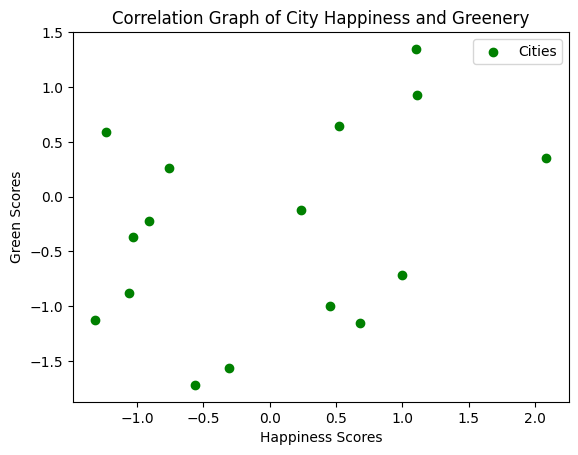

In [48]:
import matplotlib.pyplot as plt

# convert data to the correct format
x_happiness_scores = []
y_green_scores = []

for city_name in combined_score_map.keys():
    x_happiness_scores.append(combined_score_map[city_name][0])
    y_green_scores.append(combined_score_map[city_name][1])

# plot
plt.scatter(x_happiness_scores, y_green_scores, label='Cities', color='green', marker='o')
plt.xlabel('Happiness Scores')
plt.ylabel('Green Scores')
plt.title('Correlation Graph of City Happiness and Greenery')
plt.legend()

# Anzeigen des Graphens
plt.show()